In [1]:
import Pkg

In [3]:
Pkg.add("Images");
# FileIO for loading images from disk
Pkg.add("FileIO");
# using Colors package to access the color spaces
Pkg.add("Colors");

   Resolving package versions...
   Installed JpegTurbo_jll ──────────────────── v3.0.1+0
   Installed ImageIO ────────────────────────── v0.6.7
   Installed TiledIteration ─────────────────── v0.5.0
   Installed ImageSegmentation ──────────────── v1.8.2
   Installed MutableArithmetics ─────────────── v1.4.0
   Installed AxisArrays ─────────────────────── v0.4.7
   Installed TiffImages ─────────────────────── v0.6.8
   Installed Preferences ────────────────────── v1.4.1
   Installed LoggingExtras ──────────────────── v1.0.3
   Installed FFTW ───────────────────────────── v1.7.2
   Installed HistogramThresholding ──────────── v0.3.1
   Installed PNGFiles ───────────────────────── v0.4.3
   Installed RelocatableFolders ─────────────── v1.0.1
   Installed RegionTrees ────────────────────── v0.3.2
   Installed NNlib ──────────────────────────── v0.9.8
   Installed Sixel ──────────────────────────── v0.1.3
   Installed PDMats ─────────────────────────── v0.11.31
   Installed ImageMagick ───

In [2]:
using Images, Colors

In [3]:
# define size of square images
n = 300

# reference image
I0_original = load("Original_IMage1.jpg")
I0G = Gray.(I0_original)
I0 = Float64.(I0G)

# apodized image
Ia_original = load("blurred_ref.jpg")
IaG = Gray.(Ia_original)
Ia = Float64.(IaG)

# rotated image
I_original = load("rotated_image_1.jpg")
IG = Gray.(I_original)
I = Float64.(IG);

LoadError: ArgumentError: No file exists at given path: Original_IMage1.jpg

In [23]:
# the intensity function caluclates the intensity of Image I at pixel [i,j] of the deformed image after a rotation of theta 
# is applied.
# if the location of the rotated image is out of the field of view, the intensity is taken to be zero. 

function intensity(i,j,theta,I) 
    x_rot = round(
        Int, n/2 + 
        (i-n/2)*cos(theta)-(j-n/2)*sin(theta)
    )
    y_rot = round(
        Int, n/2 + 
        (i-n/2)*sin(theta) + (j-n/2)*cos(theta)
    )
    if x_rot <= 0 || x_rot > n || y_rot <= 0 || y_rot > n
        return 0 
    else 
        return I[x_rot,y_rot]
    end 
end 

intensity (generic function with 1 method)

In [24]:
# global optimization method applied to image I to check intensity function and calculate cost as a function of angle of rotation
# with respect to the original reference image. 

# define initial values
# we want a large enough value for the cost value (val) and the theta as initialization
# wlog, these are defined as such
lowest_val = 10000000000
lowest_theta = 1000
x = Float64[]
y = Float64[]

for theta in -0.78:0.01:0.78 # (-pi/2, -pi/2)
    
    # calculte cost function at current angle 
    val = sum( (I0[i,j] - intensity(i,j,theta,I))^2 for i=1:n, j=1:n )
    append!(x, theta)
    append!(y, val)

    # check if cost is lower than current lowest cost
    if val < lowest_val 
        lowest_val = val
        lowest_theta = theta
    end 

    # println(val, theta)
    
end 

println("Globally optimal cost: ", lowest_val)
println("Globally optimal theta: ", lowest_theta)

877.3829603998661
-0.07


In [ ]:
# global optimization method applied to image I to check intensity function and calculate cost as a function of angle of rotation 
# with respect to the apodized reference image

lowest_val = 10000000000
lowest_theta = 1000
x2 = Float64[]
y2 = Float64[]

for theta in -0.78:0.01:0.78
    

    val = sum( (Ia[i,j] - intensity(i,j,theta,I))^2 for i=1:n, j=1:n )
    append!(x2, theta)
    append!(y2, val)
    
    if val < lowest_val 
        lowest_val = val
        lowest_theta = theta
    end 

    # println(val, theta)
    
end 

println("Globally optimal cost: ", lowest_val)
println("Globally optimal theta: ", lowest_theta)

In [25]:
# local optimization method applied to image I with the original reference image I0. 

# define initial values 
lowest_val = 10000000000
lowest_theta = 1000
theta = 0.78
i = 0
val = sum( (I0[i,j] - intensity(i,j,theta,I))^2 for i=1:n, j=1:n )

while val < lowest_val

    # check if cost is lower than current lowest cost
    if val < lowest_val 
        lowest_val = val
        lowest_theta = theta
    end 
    
    # println(val, theta)
    
    theta = theta - 0.08
    i = i + 1

    val = sum( (I0[i,j] - intensity(i,j,theta,I))^2 for i=1:n, j=1:n )
 
end 

println("Local optimal cost: ", lowest_val)
println("Local optimal theta: ", lowest_theta)
println("Iterations: ", i)

4535.959123414036
0.7000000000000001
2


In [27]:
# local optimization method applied to image I with the apodized reference image Ia. 

# define initial values 
lowest_val = 10000000000
lowest_theta = 1000
theta = 0.78
i = 0
val = sum( (Ia[i,j] - intensity(i,j,theta,I))^2 for i=1:n, j=1:n )

while val < lowest_val

    # check if cost is lower than current lowest cost
    if val < lowest_val 
        lowest_val = val
        lowest_theta = theta
    end 
    
    # println(val, theta)
    
    theta = theta - 0.08
    i = i + 1

    val = sum( (Ia[i,j] - intensity(i,j,theta,I))^2 for i=1:n, j=1:n )
 
end 

println("Local optimal cost: ", lowest_val)
println("Local optimal theta: ", lowest_theta)
println("Iterations: ", i)

1567.2971318722696
-0.09999999999999994
12


In [8]:
using Plots, LaTeXStrings

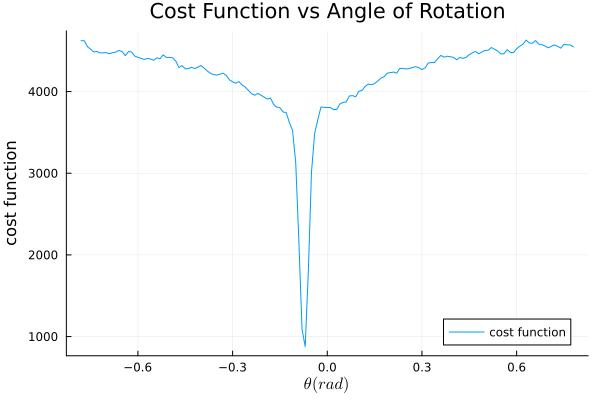

In [15]:
# reference and rotated image
plot(x, y, label="cost function", title="Cost Function vs Angle of Rotation", xlabel=L"\theta (rad)", ylabel="cost function" )

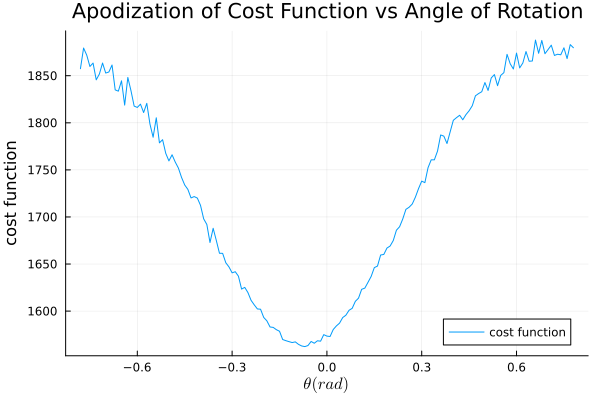

In [14]:
# apodized reference and rotated image
plot(x2, y2, label="cost function", title="Apodization of Cost Function vs Angle of Rotation", xlabel=L"\theta (rad)", ylabel="cost function" )